# Understanding LightCurveFile objects

## Learning goals

In our [LightCurve Object tutorial](LightCurve-object-Tutorial.html) we looked at how to obtain an object of interests light curve from its `TargetPixelFile` (TPF; see our [TargetPixelFile tutorial](Target-Pixel-File-Tutorial.html)) using Simple Aperture Photometry (SAP). 


In this tutorial we will demonstrate the difference between a [`TESSLightCurve`](https://docs.lightkurve.org/api/lightkurve.lightcurve.TessLightCurve.html?highlight=tesslightcurve) and a [`TESSLightCurveFile`](https://docs.lightkurve.org/api/lightkurve.lightcurvefile.TessLightCurveFile.html?highlight=tesslightcurvefiles), and will cover the following,
- What is a `LightCurveFile`.
- What is Pre-search Data Conditioning SAP flux (PSDCSAP).
- How can we examine its `metadata`.
- How we use it to create and examine an objects light curve.

## What is a LightCurveFile object?

Rather than being generated via a TPF, `TESSLightCurveFile` objects have been pre-generated using NASA's [Data Processing Pipeline](https://heasarc.gsfc.nasa.gov/docs/tess/docs/jenkinsSPIE2016-copyright.pdf).
Usually, you will access these files through the [MAST archive](https://archive.stsci.edu/kepler/data_search/search.php). 

## What is Pre-search Data Conditioning SAP flux?
`TESSLightCurveFile` objects have some level of processing (more details [here](https://arxiv.org/pdf/1207.3093.pdf)) and allow you to access the two kinds of flux; the Simple Aperture Photometry flux (SAP) flux as discussed in the [LightCurve Object tutorial](LightCurve-object-Tutorial.html), and the Pre-search Data Conditioning SAP flux (PDCSAP) flux. With PDCSAP flux long term trends have been removed from the data using so-called Co-trending Basis Vectors (CBVs). PDCSAP flux is usually cleaner data than the SAP flux and will have fewer systematic trends.

## Imports
This tutorial requires that you import lightkurve

In [1]:
%matplotlib inline 
import lightkurve as lk

## Defining terms

- Target Pixel File (TPF): A file containing the original CCD pixel observations from which light curves are extracted. 

- LightCurve Object: Obtained from a TPF and contains light curve information derived using simple aperture photometry.

- LightCurveFile Object: Obtained from MAST and contains both SAP flux and PSDCSAP flux.

- Cadence: The rate at which TESS photometric observations are stored. 

- Sector: One of TESS's 27 (to date) observing periods, approximately ~27 days in duration.

- Simple Aperture Photometry (SAP):  The act of summing all pixel values in a pre-defined aperture as a function of time.

-  Pre-search Data Conditioning SAP flux (PDCSAP) flux : SAP flux from which long term trends have been removed using so-called Co-trending Basis Vectors (CBVs). PDCSAP flux is usually cleaner data than the SAP flux and will have fewer systematic trends.

## Downloading the data

We can read in a light curve file from the TESS mission using [`TESSLightCurveFile`](https://docs.lightkurve.org/api/lightkurve.lightcurvefile.TessLightCurveFile.html?highlight=esslightcurvefile). We can use the [`search_lightcurve()`](https://docs.lightkurve.org/api/lightkurve.search.search_lightcurvefile.html#lightkurve.search.search_lightcurvefile) function to fetch the files from the data archive.

To demonstrate, lets use the [L 98-59 System](https://arxiv.org/pdf/1903.08017.pdf) again, focusing on  planet c.

In [2]:
search_result = lk.search_lightcurve('TIC 307210830 c')
search_result

#,observation,author,target_name,productFilename,distance
0,TESS Sector 2,SPOC,307210830,tess2018234235059-s0002-0000000307210830-0121-s_lc.fits,0.0
1,TESS Sector 5,SPOC,307210830,tess2018319095959-s0005-0000000307210830-0125-s_lc.fits,0.0
2,TESS Sector 8,SPOC,307210830,tess2019032160000-s0008-0000000307210830-0136-s_lc.fits,0.0
3,TESS Sector 9,SPOC,307210830,tess2019058134432-s0009-0000000307210830-0139-s_lc.fits,0.0
4,TESS Sector 10,SPOC,307210830,tess2019085135100-s0010-0000000307210830-0140-s_lc.fits,0.0
5,TESS Sector 11,SPOC,307210830,tess2019112060037-s0011-0000000307210830-0143-s_lc.fits,0.0
6,TESS Sector 12,SPOC,307210830,tess2019140104343-s0012-0000000307210830-0144-s_lc.fits,0.0


The `search_lightcurve` function takes several additional arguments, such as the `sector` number or the `mission` name. You can find examples of its use in the [online documentation](https://docs.lightkurve.org/api/lightkurve.search.search_lightcurvefile.html#lightkurve.search.search_lightcurvefile).

Like `search_targetpixelfile` the `search_lightcurve` function returns a [`SearchResult`](https://docs.lightkurve.org/api/lightkurve.search.SearchResult.html) object which has several convenient operations. For example, we can select the first data product in the list as follows,

In [3]:
search_result[0]

#,observation,author,target_name,productFilename,distance
0,TESS Sector 2,SPOC,307210830,tess2018234235059-s0002-0000000307210830-0121-s_lc.fits,0.0


We can download this data product using the download() method:

In [4]:
lcf = search_result[0].download()

The `lcf` variable we have obtained in this way is a [`TessLightCurve`](http://docs.lightkurve.org/api/lightkurve.lightcurve.TessLightCurve.html) object. This object contains time, flux and flux error information, as well as a whole lot of data about spacecraft systematics. We can view all of them by calling the object by itself:

In [5]:
lcf

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1354.1088231272427,2.4311873e+04,1.8769577e+01,-8.0589490e-04,91191,664.10903,338.97642,2.1566352e+04,1.6472113e+01,1.3385229e+03,3.5451272e+00,2.4311873e+04,1.8769577e+01,0,nan,nan,nan,nan,664.10903,5.8178976e-04,338.97642,6.0455920e-04,4.8032869e-02,1.4890091e-01
1354.1102119888994,2.4297582e+04,1.8773235e+01,-8.0592179e-04,91192,664.12611,338.96839,2.1563889e+04,1.6475323e+01,1.3444882e+03,3.5518360e+00,2.4297582e+04,1.8773235e+01,0,nan,nan,nan,nan,664.12611,5.8167754e-04,338.96839,6.0535187e-04,6.5402389e-02,1.3844931e-01
1354.112989712153,2.4282812e+04,1.8741255e+01,-8.0597564e-04,91194,664.10668,338.96049,2.1475160e+04,1.6447256e+01,1.3468779e+03,3.5524495e+00,2.4282812e+04,1.8741255e+01,0,nan,nan,nan,nan,664.10668,5.8500003e-04,338.96049,6.0745567e-04,4.0374711e-02,1.3017291e-01
1354.1143785738097,2.4275164e+04,1.8781441e+01,-8.0600253e-04,91195,664.14148,338.98328,2.1583307e+04,1.6482523e+01,1.3438405e+03,3.5524592e+00,2.4275164e+04,1.8781441e+01,0,nan,nan,nan,nan,664.14148,5.8221997e-04,338.98328,6.0431601e-04,8.0888584e-02,1.5741505e-01
1354.1157674355243,2.4288371e+04,1.8776447e+01,-8.0602936e-04,91196,664.13548,338.97358,2.1575641e+04,1.6478142e+01,1.3419084e+03,3.5480881e+00,2.4288371e+04,1.8776447e+01,0,nan,nan,nan,nan,664.13548,5.8233330e-04,338.97358,6.0483697e-04,7.4183472e-02,1.4472328e-01
1354.1171562971804,2.4280523e+04,1.8768578e+01,-8.0605625e-04,91197,664.13351,338.97214,2.1563102e+04,1.6471235e+01,1.3378163e+03,3.5436206e+00,2.4280523e+04,1.8768578e+01,0,nan,nan,nan,nan,664.13351,5.8274117e-04,338.97214,6.0512009e-04,7.1515344e-02,1.4336312e-01
1354.1185451588947,2.4286711e+04,1.8765480e+01,-8.0608309e-04,91198,664.12517,338.96675,2.1552936e+04,1.6468515e+01,1.3372028e+03,3.5442295e+00,2.4286711e+04,1.8765480e+01,0,nan,nan,nan,nan,664.12517,5.8198441e-04,338.96675,6.0517463e-04,6.5269679e-02,1.3618952e-01
1354.1199340205515,2.4255619e+04,1.8757978e+01,-8.0610998e-04,91199,664.13023,338.96995,2.1532902e+04,1.6461933e+01,1.3415085e+03,3.5453105e+00,2.4255619e+04,1.8757978e+01,0,nan,nan,nan,nan,664.13023,5.8275240e-04,338.96995,6.0552283e-04,6.8680957e-02,1.3969450e-01


Note that unlike the table generated via a `LightCurve Object`, this table contains the SAP flux and PDCSAP flux!

## Plotting the light curve

Lets now plot the light curve up for the object.

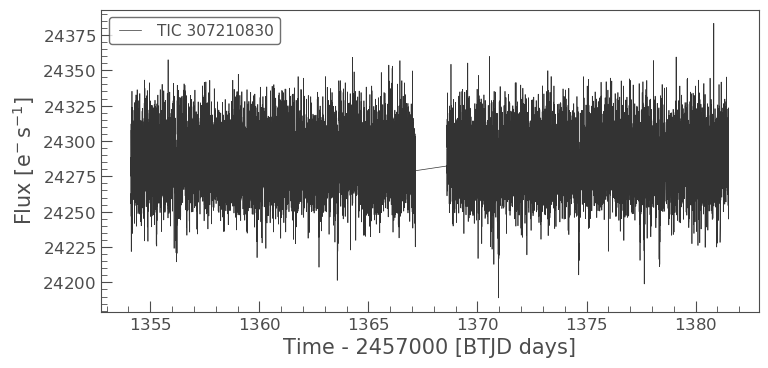

In [6]:
lcf.plot();

### SAP and PDCSAP light curves
By default, a [`TESSLightCurveFiles`](http://docs.lightkurve.org/api/lightkurve.lightcurve.TessLightCurve.html) will set the PDCSAP flux to its `.flux` property. 

To compare the PDCSAP and the SAP flux, we can use the `column` keyword while plotting.

**Note**: alternatively, you can replace the `flux` column with the `sap_flux` column by using `lcf.flux = lcf['sap_flux']

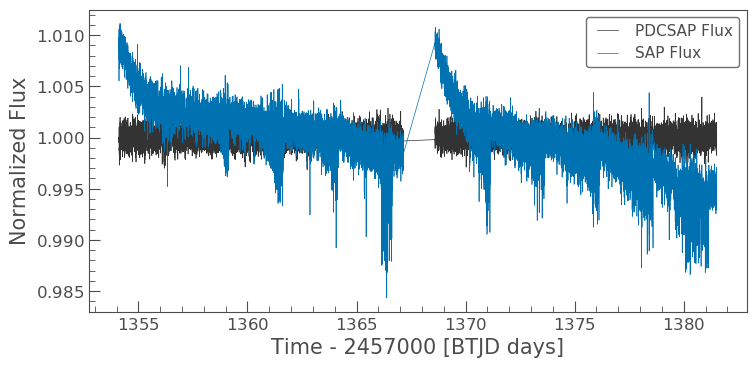

In [7]:
ax = lcf.plot(label='PDCSAP Flux', normalize=True)
lcf.plot(column='sap_flux', normalize=True, label='SAP Flux', ax=ax);

In brief:

* The SAP light curve is calculated by summing together the brightness of pixels that fall within an aperture set by the *TESS* mission. This is often referred to as the *optimal aperture*, but in spite of its name can sometimes be improved upon! Because the SAP light curve is a sum of the brightness in chosen pixels, it is still subject to systematic artifacts of the mission.

* The PDCSAP light curve is subject to more treatment than the SAP light curve, and is specifically intended for detecting planets. The PDCSAP pipeline attempts to remove systematic artifacts while keeping planetary transits intact.

Looking at the Figure we made above, you can see that the SAP light curve has a long-term change in brightness that has been removed in the PDCSAP light curve, while keeping the transits at the same depth. For most inspections, a PDCSAP light curve is what you want to use, but when looking at astronomical phenomena that aren't planets (e.g. long-term variability), the SAP flux may be preferred.

You can switch between fluxes using the following commands,

    pdcsap = lcf.flux
    
    sap =lcf.sap_flux


For now, let's continue to use the PDCSAP flux only. Because this is the default .flux property of our light curve object, we don't need to change anything.

#### Note

The `plot()` methods in *Lightkurve* always return a [Matplotlib](https://matplotlib.org/) object. This is useful because it lets us manipulate the plot using standard Matplotlib functions. For example, we can set the title as follow:

Text(0.5, 1.0, 'PDCSAP light curve of  L 98-59')

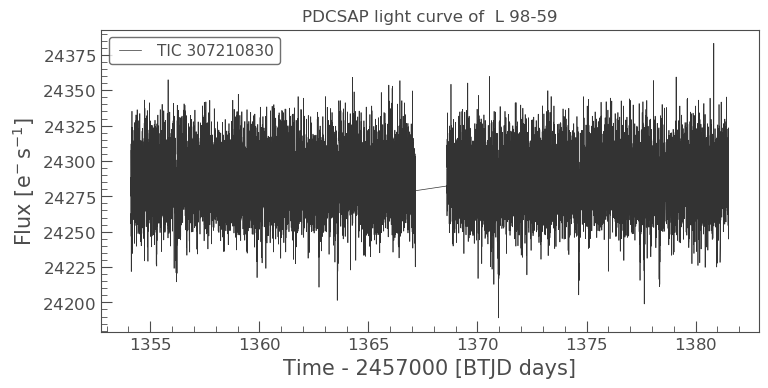

In [8]:
ax = lcf.plot() 
ax.set_title("PDCSAP light curve of  L 98-59")

Now lets fold and bin our data to look at the transit as we did in the [LightCurve Object tutorial](LightCurve-object.html). Remember the `lcf.flux` default is the PDCSAP flux this time!

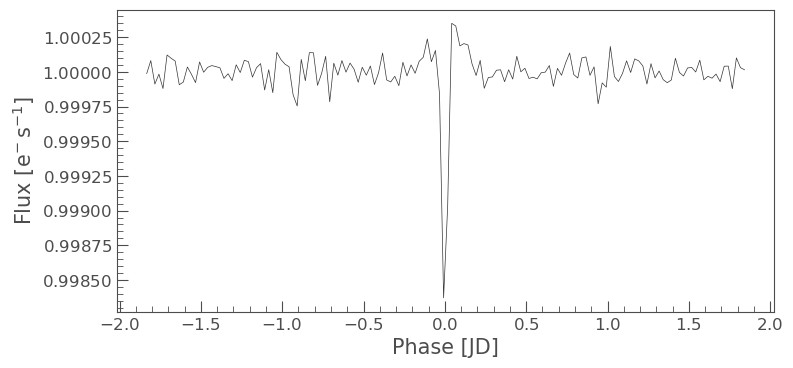

In [9]:
lcf.remove_nans().flatten(window_length=401).fold(period=3.690621,  epoch_time=1367.2755).bin(time_bin_size=0.025).plot();

## Metadata

You can check the meta data and the CDPP noise metric of the `TESSLightCurveFile` as we have in the past.

In [10]:
lcf.meta

{'inherit': True,
 'extname': 'PRIMARY',
 'extver': 1,
 'simdata': False,
 'telescop': 'TESS',
 'instrume': 'TESS Photometer',
 'object': 'TIC 307210830',
 'ticid': 307210830,
 'radesys': 'ICRS',
 'ra_obj': 124.5319,
 'dec_obj': -68.313,
 'equinox': 2000.0,
 'exposure': 21.710393585867,
 'timeref': 'SOLARSYSTEM',
 'tassign': 'SPACECRAFT',
 'timesys': 'TDB',
 'bjdrefi': 2457000,
 'bjdreff': 0.0,
 'timeunit': 'd',
 'telapse': 27.412113113468,
 'livetime': 21.71039358586663,
 'tstart': 1354.101978098092,
 'tstop': 1381.514471377755,
 'date-obs': '2018-08-23T14:25:41.724Z',
 'date-end': '2018-09-20T00:19:41.143Z',
 'deadc': 0.792,
 'timepixr': 0.5,
 'tierrela': 1.16e-05,
 'int_time': 1.98,
 'readtime': 0.02,
 'frametim': 2.0,
 'num_frm': 60,
 'timedel': 0.001388888888888889,
 'backapp': True,
 'deadapp': True,
 'vignapp': True,
 'gaina': 5.300000190734863,
 'gainb': 5.179999828338623,
 'gainc': 5.269999980926514,
 'gaind': 5.190000057220459,
 'readnoia': 10.017000198364258,
 'readnoib': 7.

In [11]:
lcf.mission

'TESS'

In [12]:
lcf.sector

2

In [13]:
lcf.estimate_cdpp()

<Quantity 218.15446034 ppm>

Congratulations! You have now learnt how to work with LightCurveFiles. 